###  \begin{equation} \texttt{Tiefe neuronale Netzwerke} \\ \Tiny \texttt{von Alexander Mroß} \end{equation}

#### Pakete

In [1]:
using LinearAlgebra, PyPlot

#### Cost-Funktion

In [2]:
function Cost(X,W2,W3,W4,b2,b3,b4,y)
    costvec = zeros(10,1);
    for i in collect(1:10)
        a2 = sigma(X[:,i],W2,b2);
        a3 = sigma(a2,W3,b3);
        a4 = sigma(a3,W4,b4);
        costvec[i] = norm(y[:,i] - a4,2);
    end
    costval = 0.5*norm(costvec,2)^2;
    return costval
end;

#### Sigmoid- bzw. S-Funktion (geglättete Treppenfunktion)

In [3]:
function sigma(x,W,b)
# sigma(z) = 1/(1+exp(-z))
y = 1 ./(1 .+exp.(-(W*x+b)));
return y
end;

#### Gesamt-Funktion $F$ zum Testen

In [4]:
function F(x,W2,b2,W3,b3,W4,b4)
    z=sigma(sigma(sigma(x,W2,b2),W3,b3),W4,b4)
    return z
end;

#### Plot-Funktion

In [5]:
function plots(X,N,W2,b2,W3,b3,W4,b4,lineplot,linspace,counter)
    
    figure()
    plot([0 1],[0 1])
    for i in 1:(N+1)
        for j in 1:(N+1)
            v = [(j-1)/N;(i-1)/N];
            z = F(v,W2,b2,W3,b3,W4,b4);
            # Zeichnen der Linie
            if (z[2]>z[1]) && (v[1]<lineplot[i])
                lineplot[i] = v[1];
            end
            # Ausfüllen des grauen Bereichs
            if z[1]>z[2]
                plot(v[1],v[2],"o",color="grey")
            end
        end
    end
    
    # Approximation durch Parabel mittels Least-squares
    #A = [ones(N+1,1) linspace linspace.^2]
    #koeff = (transpose(A)*A)\transpose(A)*lineplot
    #fx = koeff[1]*ones(N+1)+koeff[2]*linspace+koeff[3]*linspace.^2;
    
    # Plots
    plot(X[1,1:5] ,X[2,1:5], "o",color="red", label="Erfolg")
    plot(X[1,6:10],X[2,6:10],"x",color="blue",label="Niete")
    plot(0,1,color="grey",label="Trennlinie") # Trennlinie grau für Legende
    #plot(fx,linspace,color="purple",label="Trennlinie") # Trennlinie Approx lila
    #plot(lineplot,0:1/N:1,color="lightgreen",label="Trennlinie") # Trennlinie stückweise hellgrün
    xlabel("Anzahl Durchläufe = "*string(counter))
    legend(bbox_to_anchor=[0.75,0.985],loc=2,borderaxespad=0) # mit Trennlinie
    #savefig("Iter-N="*string(N)*"-C="*string(counter)*".png")
    
end; # der Plot Funktion

#### "Das neuronale Netzwerk"

In [6]:
function DNN()
    
    # (x1,x2)-Paare auf "Karte" [0,1]^2
    X = [0.1 0.3 0.1 0.6 0.4 0.6 0.5 0.9 0.4 0.7;
         0.1 0.4 0.5 0.9 0.2 0.3 0.6 0.2 0.4 0.6];

    # y = Ziel des Trainingssets / F(x) nah an [1,0] falls in Kat. A, F(x) nah an [0,1] falls in Kat. B
    y = [1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0;
         0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0];

    # Initialisieren der Gewichte und Schwellenwerte
    W2 = 0.5*randn(2,2); W3 = 0.5*randn(3,2); W4 = 0.5*randn(2,3);
    b2 = 0.5*randn(2,1); b3 = 0.5*randn(3,1); b4 = 0.5*randn(2,1);
    
    # Vorwärts- und Rückwärtspropagation + Allokation weiterer Variablen
    eta = 0.05; # Lernrate
    Niter = 5*10^5; # Anzahl Iterationen
    savecost = zeros(Niter); # enthält alle Werte der Cost-Funktion
    newcost = 0.0;
    k = 0; #für zufä.Trpkt.
    
    # Für die Plots
    N = 40; # Anzahl Unterteilungen zum Messen der Linie
    lineplot = ones(N+1);# Vektor zum Plotten der Linie
    linspace = collect(0:1/N:1);
   
    for counter = 1:Niter
        
        # zufälliger Trainingspunkt von 1 bis 10 (stoch. Grad.)
        k = Int64(ceil(10*rand()));
        # Variante analog Permutation (stabiler?!)
        # k = (counter%10)+1;
        # Vorwärts // X[:,k] = a_1, entspricht Trainingspunkt x_k (siehe auch unten bei Grad.vf.)
        a2 = sigma(X[:,k],W2,b2);
        a3 = sigma(a2,W3,b3);
        a4 = sigma(a3,W4,b4);
        # Rückwärts (backpropagation)
        delta4 = a4.*(1 .-a4).*(a4-y[:,k]);
        delta3 = a3.*(1 .-a3).*(W4'*delta4);
        delta2 = a2.*(1 .-a2).*(W3'*delta3);
        # Gradientenverfahren
        W2 = W2 - eta*delta2*X[:,k]';
        W3 = W3 - eta*delta3*a2';
        W4 = W4 - eta*delta4*a3';
        b2 = b2 - eta*delta2;
        b3 = b3 - eta*delta3;
        b4 = b4 - eta*delta4;
        # savecost befüllen mit Cost-Werten
        newcost = Cost(X,W2,W3,W4,b2,b3,b4,y);
        savecost[counter] = newcost;
        
        # Plots
        if counter in [45000 70000 90000 Niter]
            plots(X,N,W2,b2,W3,b3,W4,b4,lineplot,linspace,counter)
            lineplot = ones(N+1)
        end # der Plots

        
    end # von for-Schleife Niter

    figure()
    semilogy(1:10^4:Niter,savecost[1:10^4:Niter])
    ylim(1e-4, 1e1)
    #xlabel(L"\mathrm{Anzahl\ Iterationen}\ \ [\times 10^4]")
    xlabel("Anzahl Iterationen")
    ylabel("Cost-Funktion")
    #savefig("Iter-N="*string(N)*"-Cost.png")
    #savefig("Iter-N="*string(N)*"-Cost.pdf")
    
end; # von function DNN

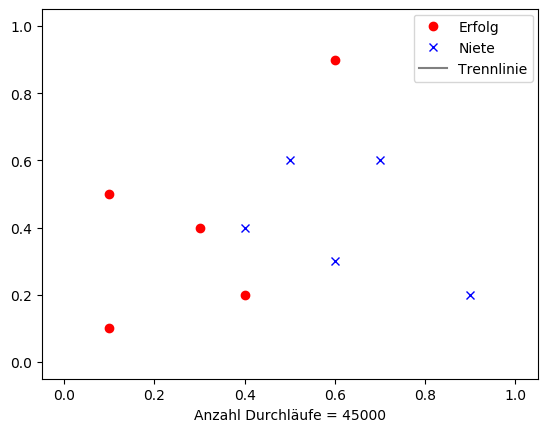

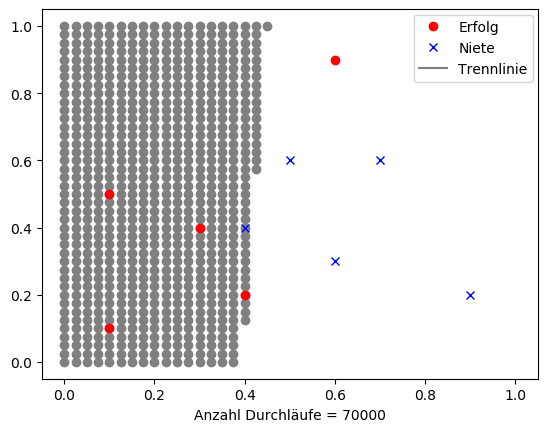

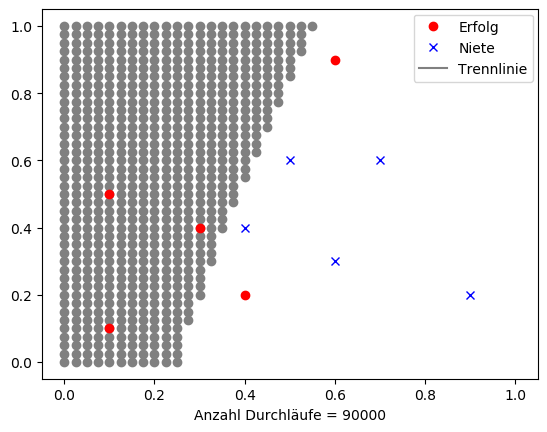

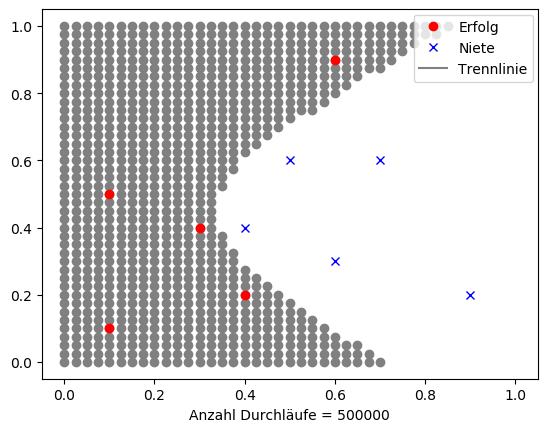

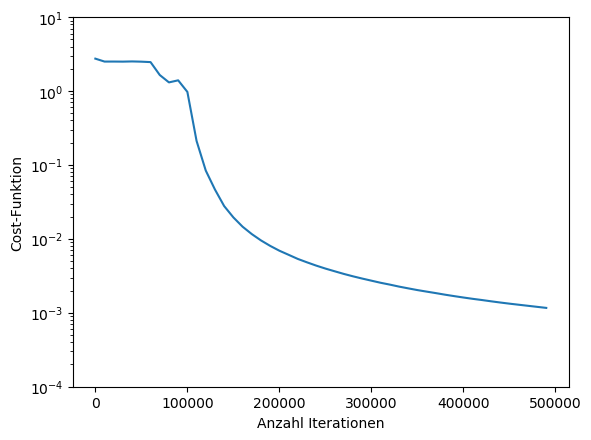

 21.124008 seconds (94.74 M allocations: 8.974 GiB, 7.87% gc time)


PyObject Text(24.000000000000007, 0.5, 'Cost-Funktion')

In [8]:
@time DNN()

#### Add-Ons

In [12]:
# Code zum Erzeugen des Standardbilds mit grüner Beispiellösung
#=
x1 = [0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7];
x2 = [0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6];
a=collect(0:0.01:1);
a1=2;
a2=0.43;
a3=0.35;
b=a1*(a.-a2).^2 .+a3;
figure()
plot(x1[1:5],x2[1:5],"o",color="red",label="Erfolg")
plot(x1[6:10],x2[6:10],"x",color="blue",label="Niete")
plot([0;1],[0;1],"x",color="white")
plot(b,a,color="lightgreen")
legend(bbox_to_anchor=[0.81,0.985],loc=2,borderaxespad=0)
savefig("Iter-Pic0Linie.pdf")
=#

In [13]:
# Zeittest
@time begin
# Test
end

  0.000001 seconds (3 allocations: 144 bytes)
